In [1]:
%load_ext autoreload
%autoreload 2

import re
import os
import glob
import sys
sys.path.insert(0, "../")

# from leitmotifs.lama import *

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

In [2]:
directory = '/Users/bzcschae/workspace/leitmotifs/tests/results/exclusion_zone'
csv_files = glob.glob(os.path.join(directory, '*.csv'))
pattern = r'[\d.]+'

def read_data():
    dataframes = []
    for file in csv_files:
        df = pd.read_csv(file, index_col=0)
        dataframes.append(df)
    
    df = pd.concat(dataframes, ignore_index=True)
    df.reset_index(inplace=True, drop=True)
    df.drop(df[df.Method == "LAMA (naive)"].index, inplace=True)
    df.Precision = df.Precision * 100
    df.Recall = df.Recall * 100

    return df

df = read_data()
df

,Dataset,Method,Precision,Recall
0,Bitcoin-Halving,LAMA (alpha=0),66.666667,66.666667
1,Bitcoin-Halving,LAMA (alpha=0.25),66.666667,66.666667
2,Bitcoin-Halving,LAMA (alpha=0.5),66.666667,66.666667
3,Bitcoin-Halving,LAMA (alpha=0.75),66.666667,66.666667
4,Bitcoin-Halving,LAMA (alpha=1),66.666667,66.666667
...,...,...,...,...
60,Queen David Bowie - Under Pressure,LAMA (alpha=0),81.250000,100.000000
61,Queen David Bowie - Under Pressure,LAMA (alpha=0.25),81.250000,100.000000
62,Queen David Bowie - Under Pressure,LAMA (alpha=0.5),81.250000,100.000000
63,Queen David Bowie - Under Pressure,LAMA (alpha=0.75),50.000000,100.000000


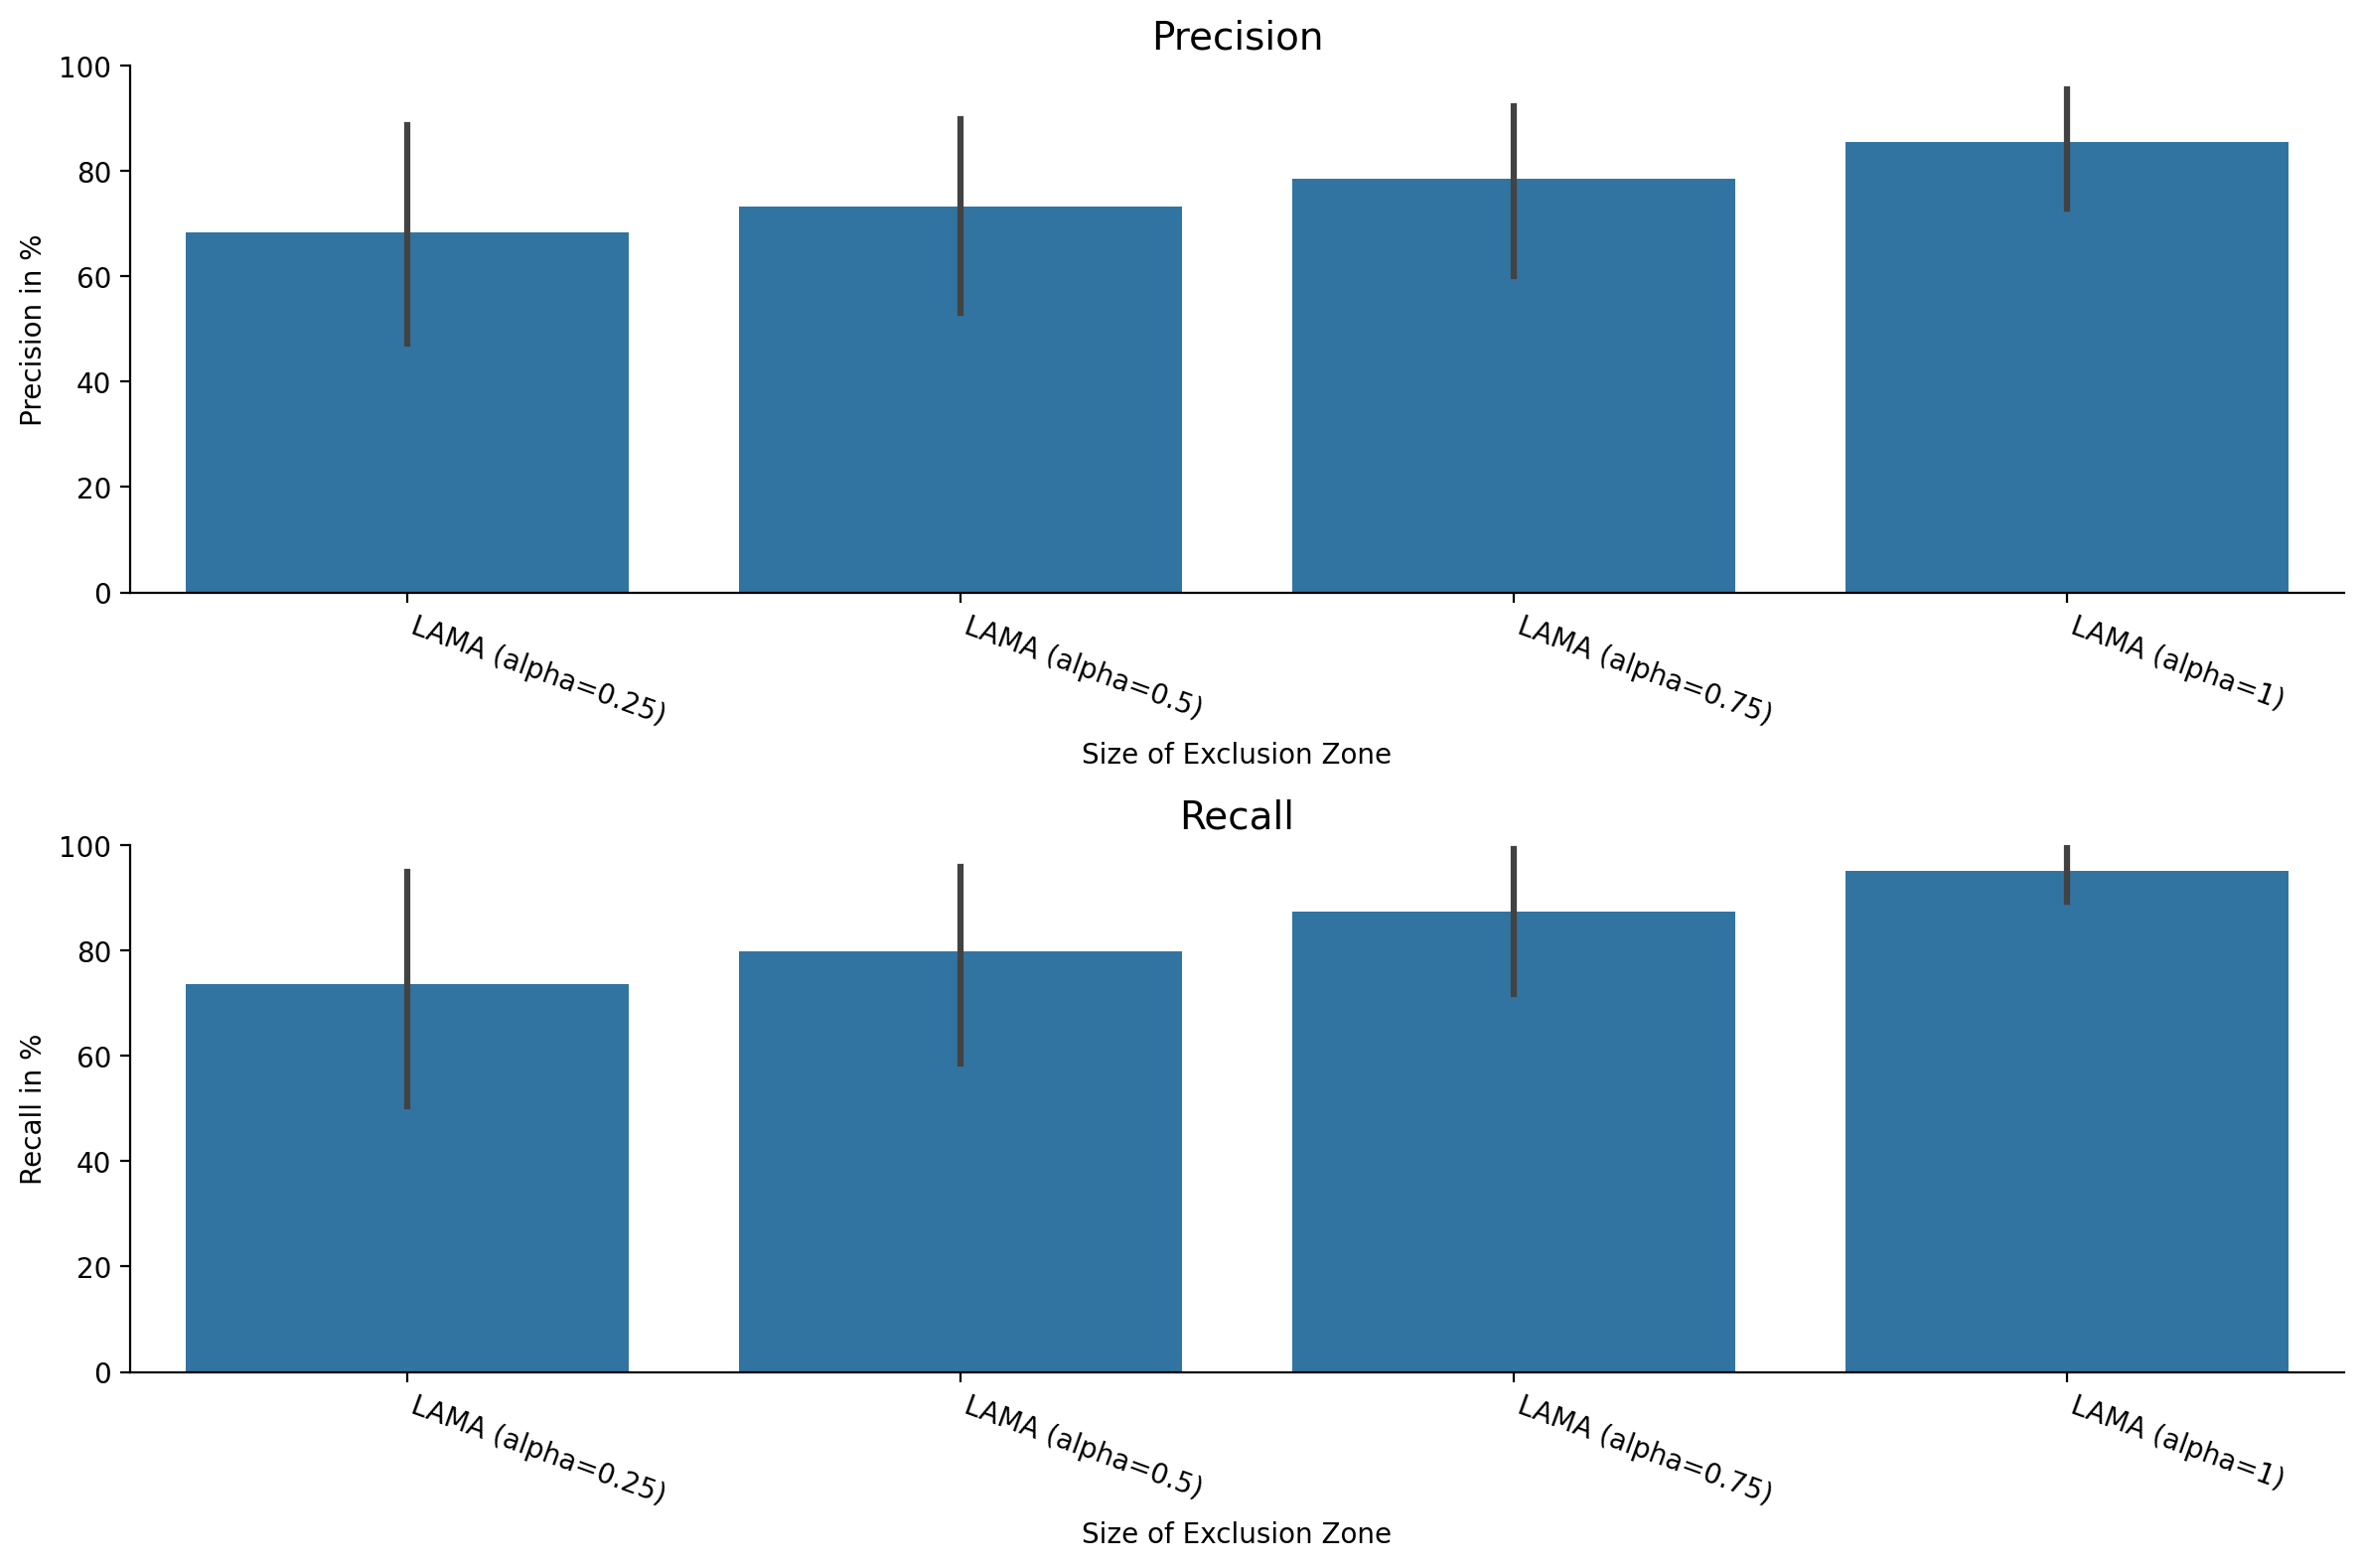

In [17]:
df = read_data()
df.Method[df.Method == "LAMA (alpha=0)"] = "LAMA"
df = df[df.Method != "LAMA"]


# filter
# with_distances = ["LAMA (cid)", "LAMA (ed)", "LAMA (cosine)"]
# df = df[~df.Method.isin(with_distances)]
# df = df.sort_values(by=["Method", "Noise Level"])

fig, ax = plt.subplots(2,1 , figsize=(12,8))

sns.barplot(x=df.Method, y=df.Precision, ax=ax[0])
ax[0].set_title("Precision", fontsize=14)
ax[0].set_ylim([0, 100])
ax[0].set_xlabel("Size of Exclusion Zone")
ax[0].set_ylabel("Precision in %")
labels = ax[0].get_xticklabels()
ax[0].set_xticklabels(labels, rotation=-20, ha='left')



sns.barplot(x=df.Method, y=df.Recall, ax=ax[1])
ax[1].set_title("Recall", fontsize=14)
ax[1].set_ylim([0, 100])
ax[1].set_xlabel("Size of Exclusion Zone")
ax[1].set_ylabel("Recall in %")
labels = ax[1].get_xticklabels()
ax[1].set_xticklabels(labels, rotation=-20, ha='left')


sns.despine()
plt.tight_layout()

plt.savefig("../tests/results/images/barplot_exclusion.pdf")

In [4]:
df.groupby([df.Method, df["Method"]])[["Precision", "Recall"]].agg(["mean"])

,,Precision,Recall
,,mean,mean
Method,Method,,
LAMA,LAMA,88.685897,95.128205
LAMA (alpha=0.25),LAMA (alpha=0.25),68.301282,73.589744
LAMA (alpha=0.5),LAMA (alpha=0.5),73.301282,79.743590
LAMA (alpha=0.75),LAMA (alpha=0.75),78.589744,87.435897
LAMA (alpha=1),LAMA (alpha=1),85.512821,95.128205


In [5]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} & \multicolumn{2}{l}{Precision} & \multicolumn{2}{l}{Recall} \\
{} &       mean & median &       mean & median \\
Method            &            &        &            &        \\
\midrule
LAMA              &  88.685897 &  100.0 &  95.128205 &  100.0 \\
LAMA (alpha=0.25) &  68.301282 &   90.0 &  73.589744 &  100.0 \\
LAMA (alpha=0.5)  &  73.301282 &   90.0 &  79.743590 &  100.0 \\
LAMA (alpha=0.75) &  78.589744 &  100.0 &  87.435897 &  100.0 \\
LAMA (alpha=1)    &  85.512821 &  100.0 &  95.128205 &  100.0 \\
\bottomrule
\end{tabular}



In [6]:
print(df.groupby([df.Method, df["Method"]])[["Precision", "Recall"]].agg(["mean", "median"]).to_markdown())

|                                            |   ('Precision', 'mean') |   ('Precision', 'median') |   ('Recall', 'mean') |   ('Recall', 'median') |
|:-------------------------------------------|------------------------:|--------------------------:|---------------------:|-----------------------:|
| ('LAMA', 'LAMA')                           |                 88.6859 |                       100 |              95.1282 |                    100 |
| ('LAMA (alpha=0.25)', 'LAMA (alpha=0.25)') |                 68.3013 |                        90 |              73.5897 |                    100 |
| ('LAMA (alpha=0.5)', 'LAMA (alpha=0.5)')   |                 73.3013 |                        90 |              79.7436 |                    100 |
| ('LAMA (alpha=0.75)', 'LAMA (alpha=0.75)') |                 78.5897 |                       100 |              87.4359 |                    100 |
| ('LAMA (alpha=1)', 'LAMA (alpha=1)')       |                 85.5128 |                       100 |      